In [29]:
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt

In [19]:
gis_data = pd.read_csv("gisaid_parsed.tsv", sep='\t')
gis_data["State"] = gis_data['State'].replace({"Baltimore":"Maryland"})
gis_data["State"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'Maryland',
       'California', 'Colorado', 'Delaware', 'Indiana', 'Massachusetts',
       'Oregon'], dtype=object)

In [47]:
# Load GISAID data and select desired columns
lineage_data = gis_data[["State", "Lineage"]]
lineage_data.head()

,State,Lineage
0,Alabama,IIb B.1.2
1,Alabama,IIb B.1.2
2,Alabama,IIb B.1.7
3,Alaska,IIb B.1.1
4,Alaska,IIb B.1.1


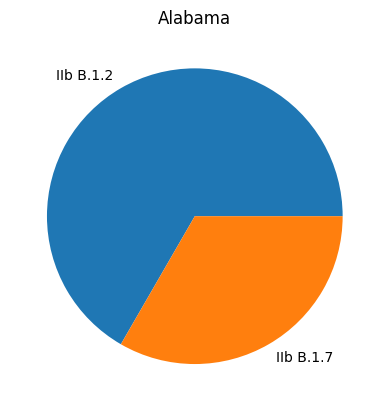

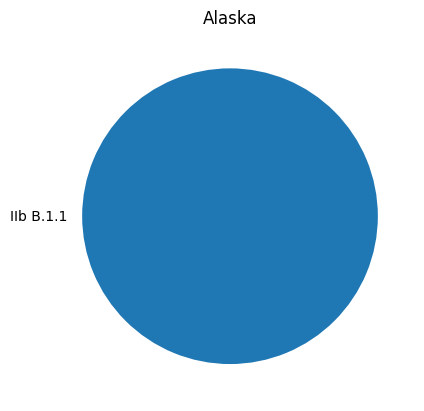

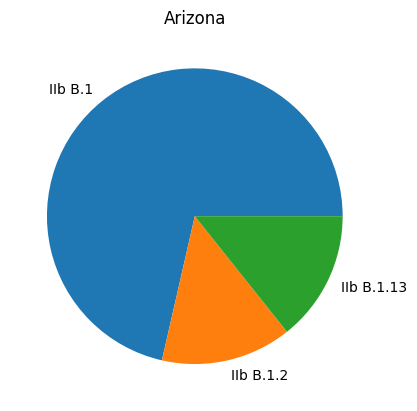

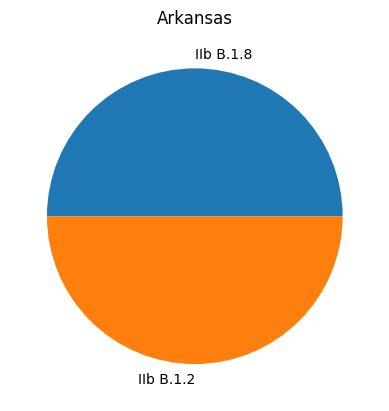

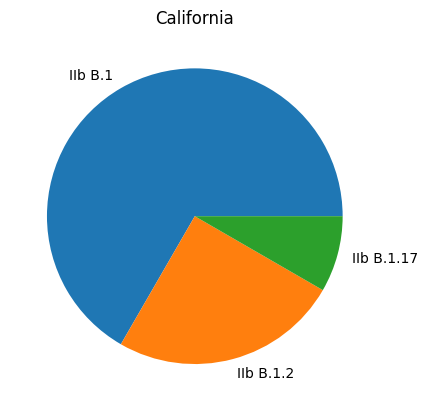

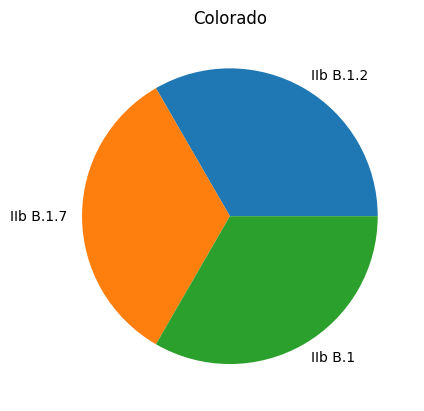

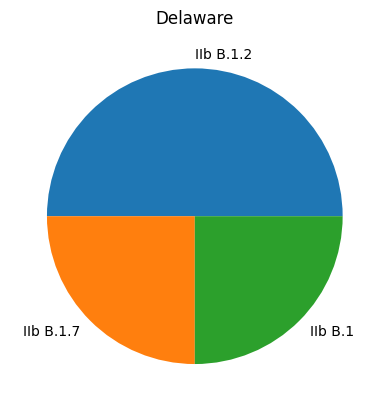

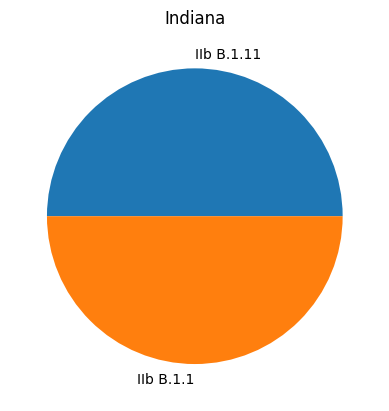

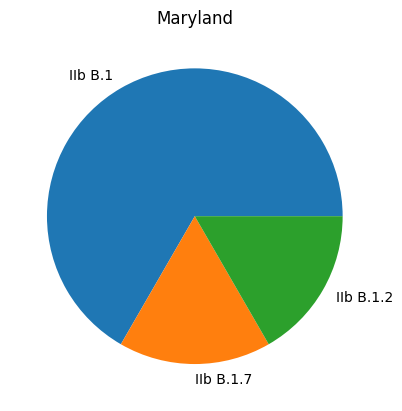

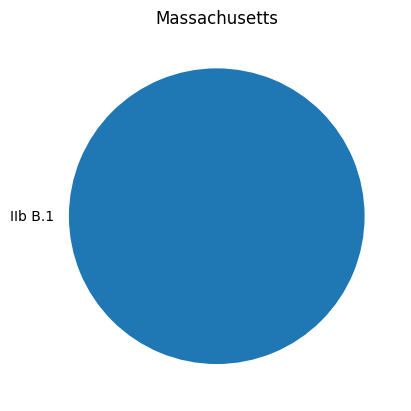

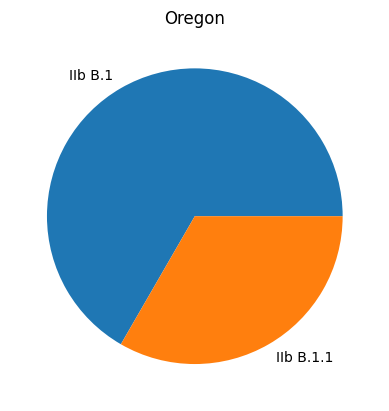

In [71]:
# Get proportion of each lineage in each state
grouped_states = lineage_data.value_counts(["State", "Lineage"]).reset_index()
grouped_states = grouped_states.groupby("State").agg(list)
for state, (labels, counts) in grouped_states.iterrows():
    plt.pie(counts, labels=labels)
    plt.title(state)
    plt.show()
# counts = lineage_data["Lineage"].value_counts()
# labels = counts.index
# labels
# plt.pie(counts, labels=labels)
# plt.legend()

<AxesSubplot: >

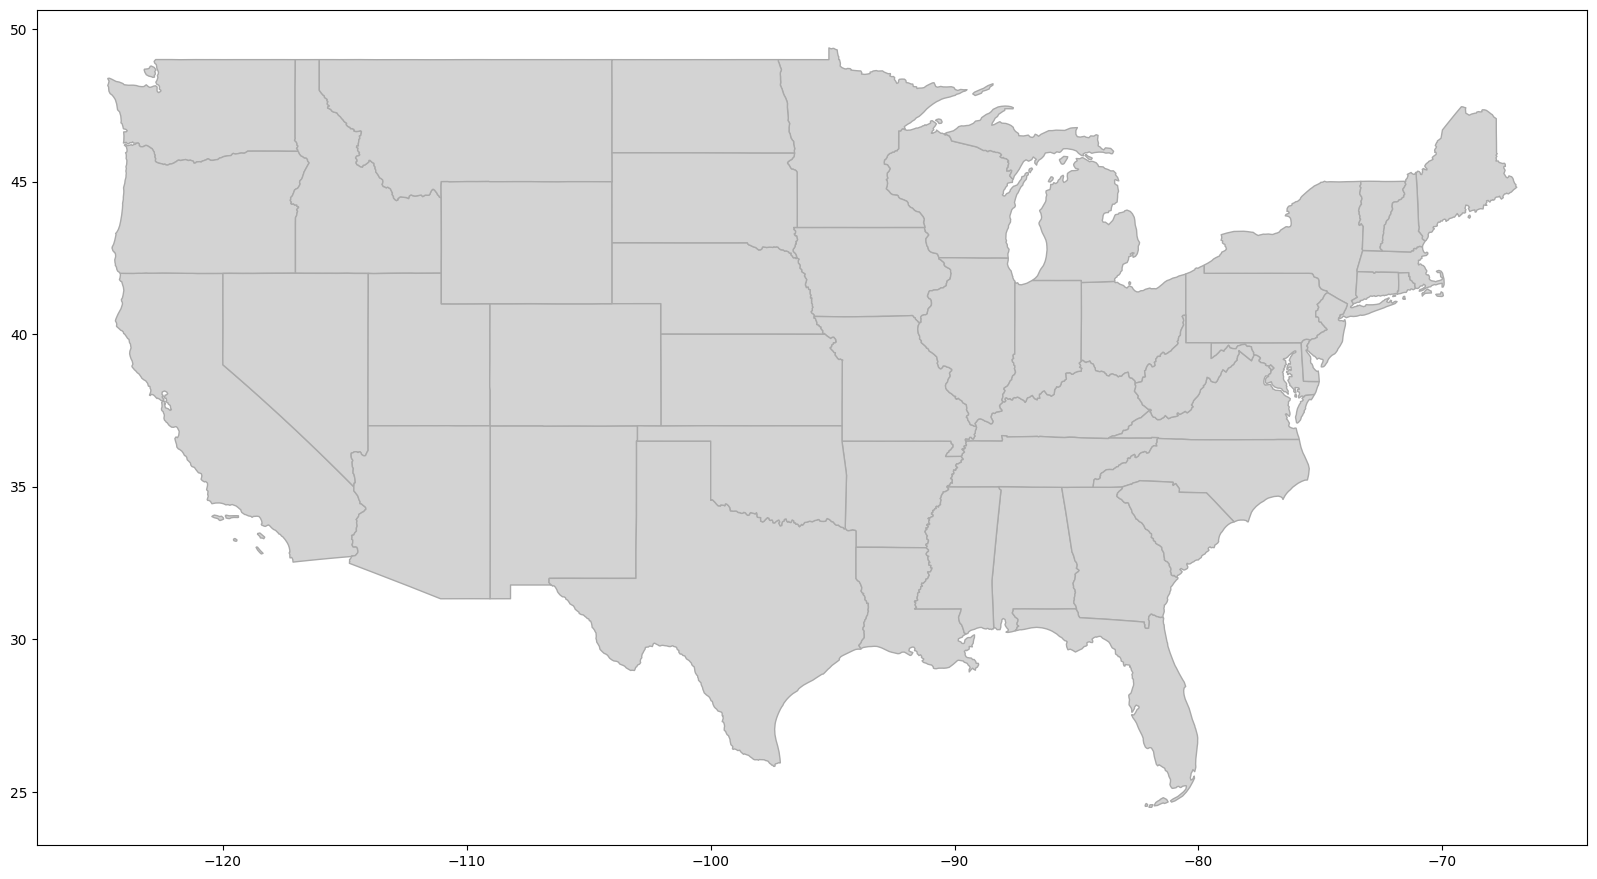

In [33]:
# Load data, select relevant columns, and restrict to continental US
shapefiles = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_20m.zip")
shapefiles = shapefiles[["GEOID", "STUSPS", "NAME", "geometry"]] #
shapefiles = shapefiles[~shapefiles["NAME"].isin(["Puerto Rico", "Alaska", "Hawaii"])]
shapefiles.plot(color="lightgrey", edgecolor="darkgrey", figsize=(20,30))